## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# some lib

In [2]:
import warnings

warnings.filterwarnings("ignore")

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [3]:
df_train = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
df_train.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
LotFrontage,1.000000,0.306795,0.234196,0.117598,0.082746,0.179283,0.363358,0.414266,0.072483,0.368392,0.180424,0.048258,0.320146,0.235755,0.064324,0.269729,0.323663,0.334901
LotArea,0.306795,1.000000,0.105806,0.014228,0.013788,0.103960,0.260833,0.299475,0.050986,0.263116,0.126031,0.014259,0.190015,0.271364,-0.024812,0.154871,0.180403,0.263843
OverallQual,0.234196,0.105806,1.000000,0.572323,0.550684,0.410238,0.537808,0.476224,0.295493,0.593007,0.550600,0.273458,0.427452,0.396765,0.518018,0.600671,0.562022,0.790982
YearBuilt,0.117598,0.014228,0.572323,1.000000,0.592855,0.314745,0.391452,0.281986,0.010308,0.199010,0.468271,0.242656,0.095589,0.147716,0.780555,0.537850,0.478954,0.522897
YearRemodAdd,0.082746,0.013788,0.550684,0.592855,1.000000,0.179186,0.291066,0.240379,0.140024,0.287389,0.439046,0.183331,0.191740,0.112581,0.618130,0.420622,0.371600,0.507101
MasVnrArea,0.179283,0.103960,0.410238,0.314745,0.179186,1.000000,0.362452,0.342160,0.174019,0.389893,0.275730,0.200802,0.280027,0.247906,0.249367,0.363778,0.372567,0.475241
TotalBsmtSF,0.363358,0.260833,0.537808,0.391452,0.291066,0.362452,1.000000,0.819530,-0.174512,0.454868,0.323722,-0.048804,0.285573,0.339519,0.311700,0.434585,0.486665,0.613581
1stFlrSF,0.414266,0.299475,0.476224,0.281986,0.240379,0.342160,0.819530,1.000000,-0.202646,0.566024,0.380637,-0.119916,0.409516,0.410531,0.227127,0.439317,0.489782,0.605852
2ndFlrSF,0.072483,0.050986,0.295493,0.010308,0.140024,0.174019,-0.174512,-0.202646,1.000000,0.687501,0.421378,0.609707,0.616423,0.194561,0.069315,0.183926,0.138347,0.319334
GrLivArea,0.368392,0.263116,0.593007,0.199010,0.287389,0.389893,0.454868,0.566024,0.687501,1.000000,0.630012,0.415772,0.825489,0.461679,0.221977,0.467247,0.468997,0.708624


✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [8]:
drop_columns = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath',
                'BsmtHalfBath','BedroomAbvGr', 'KitchenAbvGr','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                   'PoolArea', 'MiscVal', 'MoSold','YrSold']
df_train = df_train.drop(drop_columns, axis = 1)

Все эти признаки были удалены, т.к. они имеют малую корелляцию с нашим таргетом.

In [9]:
df_train.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
LotFrontage,1.000000,0.426095,0.251646,0.123349,0.088866,0.193458,0.392075,0.457181,0.080177,0.402797,0.198769,0.053532,0.352096,0.266639,0.070250,0.285691,0.344997,0.351799
LotArea,0.426095,1.000000,0.105806,0.014228,0.013788,0.104160,0.260833,0.299475,0.050986,0.263116,0.126031,0.014259,0.190015,0.271364,-0.024947,0.154871,0.180403,0.263843
OverallQual,0.251646,0.105806,1.000000,0.572323,0.550684,0.411876,0.537808,0.476224,0.295493,0.593007,0.550600,0.273458,0.427452,0.396765,0.547766,0.600671,0.562022,0.790982
YearBuilt,0.123349,0.014228,0.572323,1.000000,0.592855,0.315707,0.391452,0.281986,0.010308,0.199010,0.468271,0.242656,0.095589,0.147716,0.825667,0.537850,0.478954,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.592855,1.000000,0.179618,0.291066,0.240379,0.140024,0.287389,0.439046,0.183331,0.191740,0.112581,0.642277,0.420622,0.371600,0.507101
MasVnrArea,0.193458,0.104160,0.411876,0.315707,0.179618,1.000000,0.363936,0.344501,0.174561,0.390857,0.276833,0.201444,0.280682,0.249070,0.252691,0.364204,0.373066,0.477493
TotalBsmtSF,0.392075,0.260833,0.537808,0.391452,0.291066,0.363936,1.000000,0.819530,-0.174512,0.454868,0.323722,-0.048804,0.285573,0.339519,0.322445,0.434585,0.486665,0.613581
1stFlrSF,0.457181,0.299475,0.476224,0.281986,0.240379,0.344501,0.819530,1.000000,-0.202646,0.566024,0.380637,-0.119916,0.409516,0.410531,0.233449,0.439317,0.489782,0.605852
2ndFlrSF,0.080177,0.050986,0.295493,0.010308,0.140024,0.174561,-0.174512,-0.202646,1.000000,0.687501,0.421378,0.609707,0.616423,0.194561,0.070832,0.183926,0.138347,0.319334
GrLivArea,0.402797,0.263116,0.593007,0.199010,0.287389,0.390857,0.454868,0.566024,0.687501,1.000000,0.630012,0.415772,0.825489,0.461679,0.231197,0.467247,0.468997,0.708624


✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [10]:
df_train.isna().any().any()

True

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [12]:
df_train = df_train.drop(['Alley', 'PoolQC','Fence', 'MiscFeature', 'FireplaceQu'], axis = 1)

Удалил эти признаки потому, что в них очень много пропусков. Нецелесообразно заполнять их.

✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [14]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [15]:
df_num = df_train.select_dtypes(['float64', 'int64'])

In [16]:
df_num = df_num.fillna(df_num.mean())

In [17]:
df_train[df_num.columns] = df_num

In [18]:
df_obj = df_train.select_dtypes('object')
df_obj_cols = df_train.select_dtypes('object')

In [20]:
myImputer = SimpleImputer (strategy= 'most_frequent')

In [21]:
df_obj = myImputer.fit_transform(df_obj)

In [22]:
df_obj = pd.DataFrame(df_obj,columns = df_obj_cols.columns)

In [23]:
df_train[df_obj.columns] = df_obj

Числовые признаки заполнил средним значением. Объекты типа object заполнил значением наиболее часто встречающимся в каждом конкретном столбце при помощи SimpleImputer.

✅ Проверьте, что вы действительно избавились от пропусков

In [24]:
df_train.isna().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive  

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder(sparse_output = True, drop='first')

In [27]:
ohe.fit(df_obj)

OneHotEncoder(drop='first')

In [28]:
codes = ohe.transform(df_obj).toarray()

In [29]:
codes

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [30]:
feature_names = ohe.get_feature_names_out(df_obj.columns)
feature_names

array(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Cond

In [31]:
df_train_coded = pd.concat([df_train.select_dtypes(exclude='object'),
            pd.DataFrame(codes, columns=feature_names).astype(int)], axis=1)

In [32]:
df_train_coded['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [33]:
df_train_coded.columns.tolist()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood

Выбрал OHE в качестве енкодера для того, чтобы модель не обнаружила ложные зависимости(т.к. значения каждого столбца будут кодироваться числами $0..n$). OHE позволяет избежать этого, главное удалить первый стобец, чтобы избежать линейности.

✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

<Axes: >

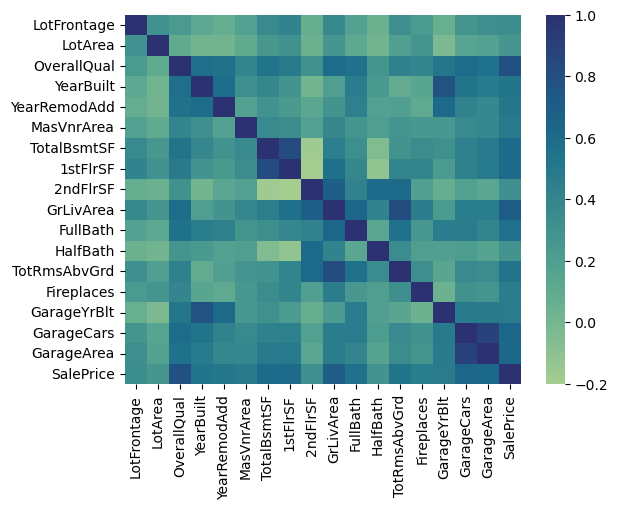

In [34]:
sns.heatmap(df_train_coded[df_num.columns].corr(),cmap="crest")

Как можно заметить в большей степени влияет на стоимость только общее состояние дома значительно, но и оставшиеся признаки тоже вносят свой вклад.

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [35]:
df_train_coded[df_num.columns].corr()['SalePrice'].sort_values(ascending=False)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
LotFrontage     0.334901
2ndFlrSF        0.319334
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

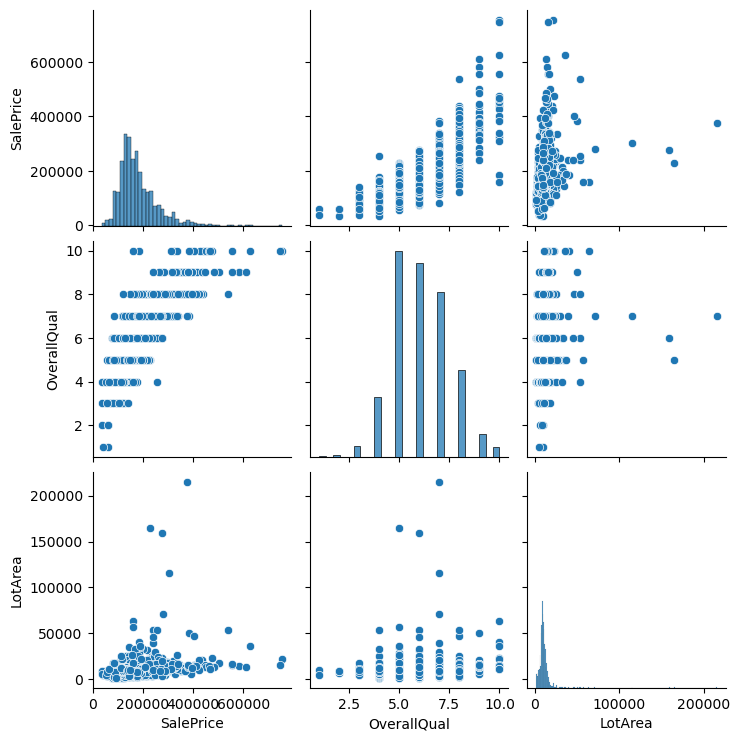

In [76]:
sns.pairplot(df_train_coded[['SalePrice', 'OverallQual', 'LotArea']])


✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

<Axes: xlabel='SalePrice', ylabel='Count'>

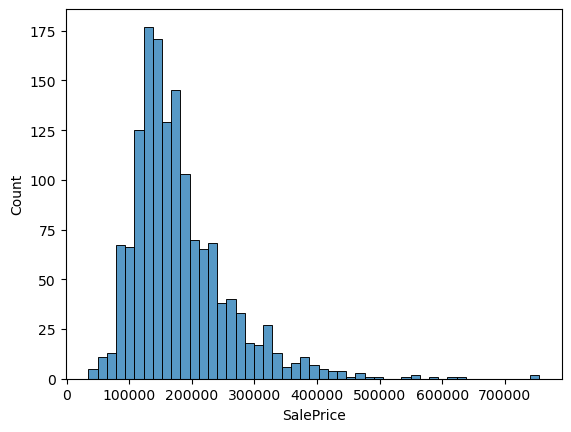

In [37]:
sns.histplot(df_train_coded['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Count'>

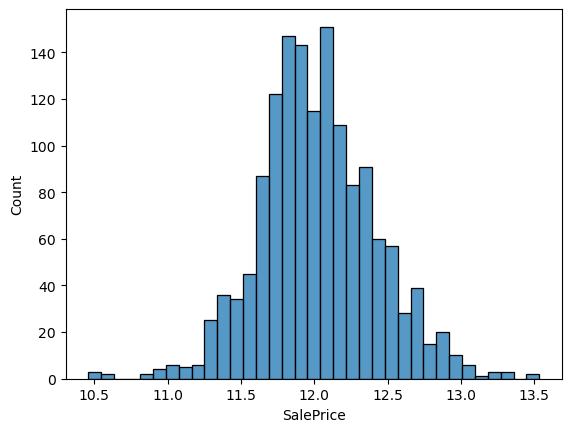

In [38]:
sns.histplot(np.log1p(df_train_coded['SalePrice']))

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [39]:
y = np.log1p(df_train_coded['SalePrice'])
X = df_train_coded.drop('SalePrice', axis = 1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 13)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

### Линейная регрессия

In [43]:
regressor = LinearRegression()

In [44]:
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
pred = regressor.predict(X_test)


In [78]:
print('Linear Regression metrics:')
print('MSE =', mean_squared_error(pred, y_test), '\n',
      'MAE =', mean_absolute_error(pred, y_test), '\n',
      'R2 =', r2_score(pred, y_test))

Linear Regression metrics:
MSE = 0.0437223187381299 
 MAE = 0.10435683596161097 
 R2 = 0.7500279486895227


### Побор гиперпараметра(коэффициента регуляризации) 

In [49]:
alphas_lasso = [0.0001, 0.001, 0.01, 0.1, 1, 10]

lasso = LassoCV(cv=5, alphas = alphas_lasso, random_state = 13).fit(X_train, y_train)

value_lasso = lasso.alphas_
array_error = lasso.mse_path_

a = []
for i in range(len(array_error)):
    m = np.mean(array_error[i])
    a.append(m)

d2 = {"MSE": pd.Series(a), "alphas": pd.Series(value_lasso)}
df2 = pd.DataFrame(d2)
print(df2)

        MSE   alphas
0  0.042157  10.0000
1  0.029186   1.0000
2  0.025522   0.1000
3  0.019882   0.0100
4  0.015185   0.0010
5  0.015433   0.0001


**При альфа равной 0.001 получено наименьшее среднеквадратичное отклонение, следовательно будем использовать это значение для обучения моделей.**

### Регрессия Lasso

In [50]:
lasso_1 = Lasso(alpha=0.001)
lasso_1.fit(X_train, y_train)

pred_lasso = lasso_1.predict(X_test)

In [51]:
print('Lasso metrics:')
print('MSE =', mean_squared_error(pred_lasso, y_test), '\n', 'MAE =', mean_absolute_error(pred_lasso, y_test), '\n', 'R2 =', r2_score(pred_lasso, y_test))

Lasso metrics:
MSE = 0.0482377564951418 
 MAE = 0.10667648927751044 
 R2 = 0.7186796122907109


### Регрессия Lasso

In [52]:
ridge_1 = Ridge(alpha=0.001)
ridge_1.fit(X_train, y_train)

pred_ridge = ridge_1.predict(X_test)

In [81]:
print('Ridge metrics:')
print('MSE =', mean_squared_error(pred_ridge, y_test), '\n', 'MAE =', mean_absolute_error(pred_ridge, y_test), '\n', 'R2 =', r2_score(pred_ridge, y_test))

Ridge metrics:
MSE = 0.04371883354956643 
 MAE = 0.1043521535993292 
 R2 = 0.7500324007370849


**Linear Regression metrics:
MSE = 0.0437223187381299, 
 MAE = 0.10435683596161097, 
 R2 = 0.7500279486895227,**
 
**Lasso metrics:
MSE = 0.0482377564951418,
 MAE = 0.10667648927751044,
 R2 = 0.7186796122907109,**
 
**Ridge metrics:
MSE = 0.04371883354956643, 
 MAE = 0.1043521535993292, 
 R2 = 0.7500324007370849.**

Как можно заметить, линейная регрессия и ридж имеют очень близкие значения метрик, лассо же показывает улучшение только в коэффициенте детерминации.

✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

<Axes: ylabel='Count'>

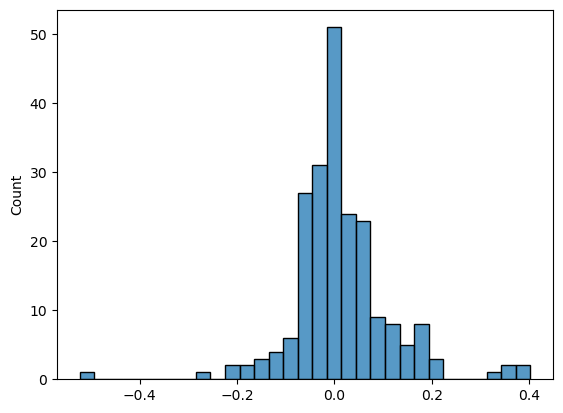

In [66]:
sns.histplot(regressor.coef_)

<Axes: ylabel='Count'>

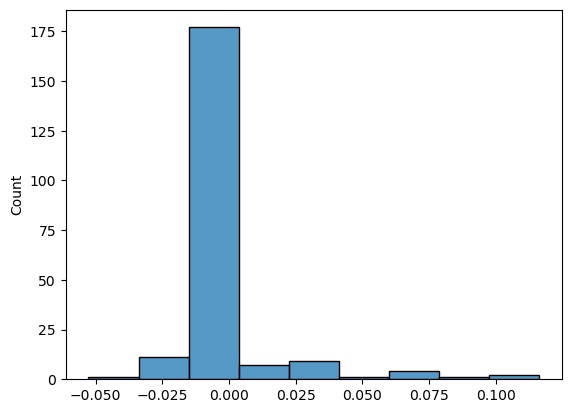

In [65]:
sns.histplot(lasso_1.coef_)

<Axes: ylabel='Count'>

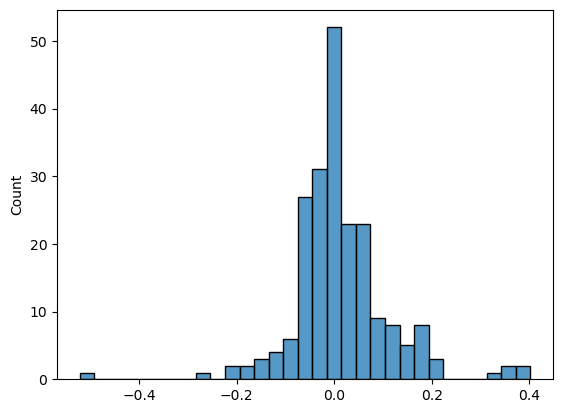

In [63]:
sns.histplot(ridge_1.coef_)


Как и в предыдущем пункте линейная регрессия и ридж почти идентичны, в то время как лассо, имеет большое количество нулевых коэффициентов, что следует из ее свойств(Lasso склонна к отбору признаков).